In [1]:
import pandas as pd
import numpy as np
import fyp_functions as fyp
import matplotlib.pyplot as plt
import itertools

In [2]:
#P = fyp.generate_random_preferences(3, 2,2)
P= np.array([[0.2, 0.8], [0.2, 0.8], [0.5, 0.5]])

fyp.tradeoff_with_alpha(P,20)

TypeError: only integer scalar arrays can be converted to a scalar index

In [3]:
P

array([[0.9, 0.1],
       [0.8, 0.2],
       [0.4, 0.6]])

In [48]:
df = fyp.mass_calculate_fairness(n=3, m=2, mechanism='IMM', 
                                          metrics=['mean'])
df2 = fyp.mass_calculate_fairness(n=3, m=2, mechanism='WMPM', 
                                          metrics=['mean'])

df3 = pd.merge(df, df2, left_index=True, right_index=True, suffixes=('_IMM', '_WMPM'))

df3.rename(columns={'mean_IMM':'dist_mean_IMM','mean_WMPM':'dist_mean_WMPM','profile_IMM':'profile'},inplace=True)
df3.drop(columns=['profile_WMPM'],inplace=True)

df3['allocation_IMM'] = np.round(df3['allocation_IMM'],3)
df3['mean_vote'] = df3['profile'].apply(lambda x: np.round(np.mean(x, axis=0),3))
df3['dist_mean_IMM'] = df3['dist_mean_IMM'].apply(lambda x: np.round(x,3))
df3['dist_mean_WMPM'] = df3['dist_mean_WMPM'].apply(lambda x: np.round(x,3))

In [5]:
df3['allocation_IMM'][0]

array([0., 1.])

In [61]:
from scipy.stats import skew
def calculate_profile(profile,mode):
    first_elements = [pair[0] for pair in profile]

    if mode == 'range':
        return max(first_elements) - min(first_elements)

    elif mode == 'std':
        return np.std(first_elements)
    
    elif mode == 'skew':
        return skew(first_elements)
    
def fairness_comparison(wmpm, imm):
    wmpm_rounded = np.round(wmpm, 3)
    imm_rounded = np.round(imm, 3)
    if wmpm_rounded < imm_rounded:
        return True
    elif wmpm_rounded > imm_rounded:
        return False
    else:
        return 'Equal'

# Apply the function to create the 'is_WMPM_fairer' column
df3['is_WMPM_fairer'] = df3.apply(
    lambda row: fairness_comparison(row['dist_mean_WMPM'], row['dist_mean_IMM']), axis=1
)


df3['range'] = df3['profile'].apply(calculate_profile, mode='range')
df3['std'] = df3['profile'].apply(calculate_profile, mode='std')
df3['skew'] = df3['profile'].apply(calculate_profile, mode='skew')
df3['sum_distance_from_median'] = df3['profile'].apply(
    lambda x: np.sum(np.sum(np.abs(x - np.median(x, axis=0)), axis=1))
)
df3['max_distance_from_median'] = df3['profile'].apply(
    lambda x: np.max(np.sum(np.abs(x - np.median(x, axis=0)), axis=1))
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\3576345296.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return skew(first_elements)


In [42]:
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.3f}".format

len(df3[(df3['is_WMPM_fairer']==False)&(df3['std'] <0.25)]['profile'])


132

In [62]:
df3.head()

,profile,allocation_IMM,dist_mean_IMM,allocation_WMPM,dist_mean_WMPM,mean_vote,is_WMPM_fairer,range,std,skew,sum_distance_from_median,max_distance_from_median
0,"[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]","[0.0, 1.0]",0.000,"[0.0, 1.0]",0.000,"[0.0, 1.0]",Equal,0.000,0.000,NaN,0.000,0.000
1,"[[0.0, 1.0], [0.0, 1.0], [0.1, 0.9]]","[0.1, 0.9]",0.133,"[0.0, 1.0]",0.067,"[0.033, 0.967]",True,0.100,0.047,0.707,0.200,0.200
2,"[[0.0, 1.0], [0.0, 1.0], [0.2, 0.8]]","[0.2, 0.8]",0.267,"[0.0, 1.0]",0.133,"[0.067, 0.933]",True,0.200,0.094,0.707,0.400,0.400
3,"[[0.0, 1.0], [0.0, 1.0], [0.3, 0.7]]","[0.3, 0.7]",0.400,"[0.0, 1.0]",0.200,"[0.1, 0.9]",True,0.300,0.141,0.707,0.600,0.600
4,"[[0.0, 1.0], [0.0, 1.0], [0.4, 0.6]]","[0.333, 0.667]",0.400,"[0.0, 1.0]",0.267,"[0.133, 0.867]",True,0.400,0.189,0.707,0.800,0.800


In [63]:
df3['is_WMPM_fairer'].value_counts()

is_WMPM_fairer
Equal    611
False    492
True     228
Name: count, dtype: int64

In [64]:
thres = max(df3[df3['is_WMPM_fairer'] == True]['std'])

In [72]:
df3[(df3['is_WMPM_fairer']  == False) & (df3['std']<thres)].head(12)

,profile,allocation_IMM,dist_mean_IMM,allocation_WMPM,dist_mean_WMPM,mean_vote,is_WMPM_fairer,range,std,skew,sum_distance_from_median,max_distance_from_median
137,"[[0.1, 0.9], [0.1, 0.9], [0.5, 0.5]]","[0.333, 0.667]",0.200,"[0.1, 0.9]",0.267,"[0.233, 0.767]",False,0.400,0.189,0.707,0.800,0.800
138,"[[0.1, 0.9], [0.1, 0.9], [0.6, 0.4]]","[0.333, 0.667]",0.133,"[0.1, 0.9]",0.333,"[0.267, 0.733]",False,0.500,0.236,0.707,1.000,1.000
149,"[[0.1, 0.9], [0.2, 0.8], [0.6, 0.4]]","[0.333, 0.667]",0.067,"[0.2, 0.8]",0.200,"[0.3, 0.7]",False,0.500,0.216,0.595,1.000,0.800
160,"[[0.1, 0.9], [0.3, 0.7], [0.6, 0.4]]","[0.333, 0.667]",0.000,"[0.3, 0.7]",0.067,"[0.333, 0.667]",False,0.500,0.205,0.239,1.000,0.600
177,"[[0.1, 0.9], [0.5, 0.5], [0.1, 0.9]]","[0.333, 0.667]",0.200,"[0.1, 0.9]",0.267,"[0.233, 0.767]",False,0.400,0.189,0.707,0.800,0.800
188,"[[0.1, 0.9], [0.6, 0.4], [0.1, 0.9]]","[0.333, 0.667]",0.133,"[0.1, 0.9]",0.333,"[0.267, 0.733]",False,0.500,0.236,0.707,1.000,1.000
189,"[[0.1, 0.9], [0.6, 0.4], [0.2, 0.8]]","[0.333, 0.667]",0.067,"[0.2, 0.8]",0.200,"[0.3, 0.7]",False,0.500,0.216,0.595,1.000,0.800
190,"[[0.1, 0.9], [0.6, 0.4], [0.3, 0.7]]","[0.333, 0.667]",0.000,"[0.3, 0.7]",0.067,"[0.333, 0.667]",False,0.500,0.205,0.239,1.000,0.600
259,"[[0.2, 0.8], [0.1, 0.9], [0.6, 0.4]]","[0.333, 0.667]",0.067,"[0.2, 0.8]",0.200,"[0.3, 0.7]",False,0.500,0.216,0.595,1.000,0.800
269,"[[0.2, 0.8], [0.2, 0.8], [0.5, 0.5]]","[0.333, 0.667]",0.067,"[0.2, 0.8]",0.200,"[0.3, 0.7]",False,0.300,0.141,0.707,0.600,0.600


In [83]:
to_check = df3[(df3['is_WMPM_fairer']  == False) & (df3['std']<thres)]['profile']

In [84]:
def has_duplicate_votes(profile):
    unique_votes = np.unique(profile, axis=0)  # Find unique rows
    return unique_votes.shape[0] < profile.shape[0]  # Check if duplicates exist

# Filter out profiles with duplicate votes
to_check2 = [profile for profile in to_check if not has_duplicate_votes(profile)]

In [87]:
to_check2

[array([[0.1, 0.9],
        [0.2, 0.8],
        [0.6, 0.4]]),
 array([[0.1, 0.9],
        [0.3, 0.7],
        [0.6, 0.4]]),
 array([[0.1, 0.9],
        [0.6, 0.4],
        [0.2, 0.8]]),
 array([[0.1, 0.9],
        [0.6, 0.4],
        [0.3, 0.7]]),
 array([[0.2, 0.8],
        [0.1, 0.9],
        [0.6, 0.4]]),
 array([[0.2, 0.8],
        [0.3, 0.7],
        [0.5, 0.5]]),
 array([[0.2, 0.8],
        [0.3, 0.7],
        [0.6, 0.4]]),
 array([[0.2, 0.8],
        [0.3, 0.7],
        [0.7, 0.3]]),
 array([[0.2, 0.8],
        [0.5, 0.5],
        [0.3, 0.7]]),
 array([[0.2, 0.8],
        [0.6, 0.4],
        [0.1, 0.9]]),
 array([[0.2, 0.8],
        [0.6, 0.4],
        [0.3, 0.7]]),
 array([[0.2, 0.8],
        [0.7, 0.3],
        [0.3, 0.7]]),
 array([[0.3, 0.7],
        [0.1, 0.9],
        [0.6, 0.4]]),
 array([[0.3, 0.7],
        [0.2, 0.8],
        [0.5, 0.5]]),
 array([[0.3, 0.7],
        [0.2, 0.8],
        [0.6, 0.4]]),
 array([[0.3, 0.7],
        [0.2, 0.8],
        [0.7, 0.3]]),
 array([

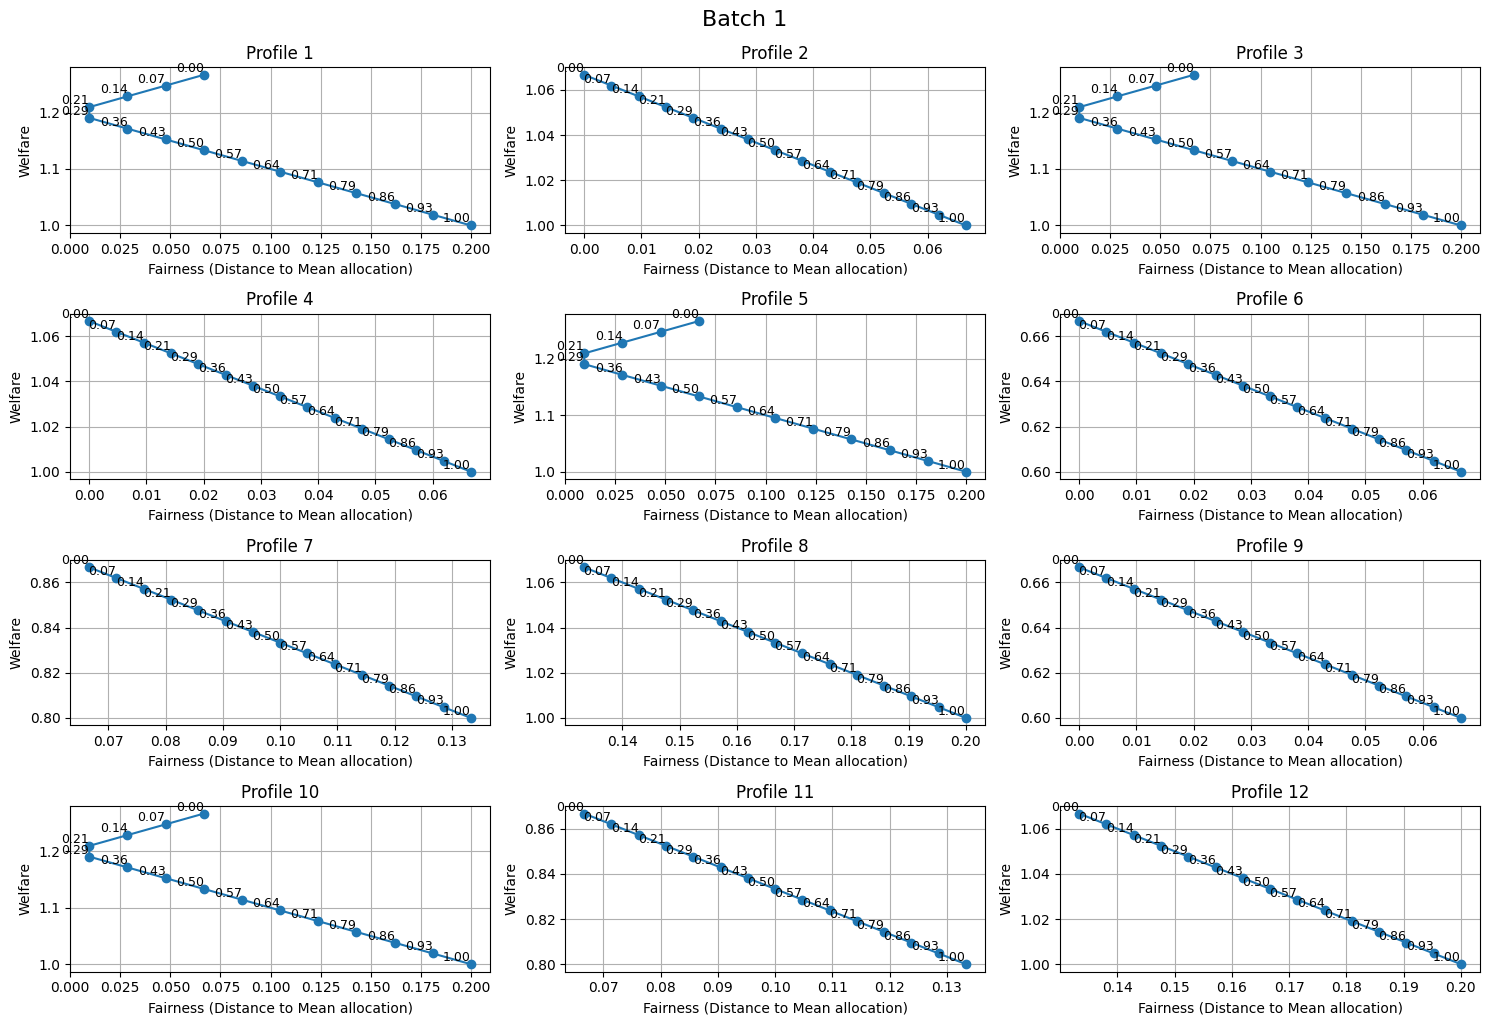

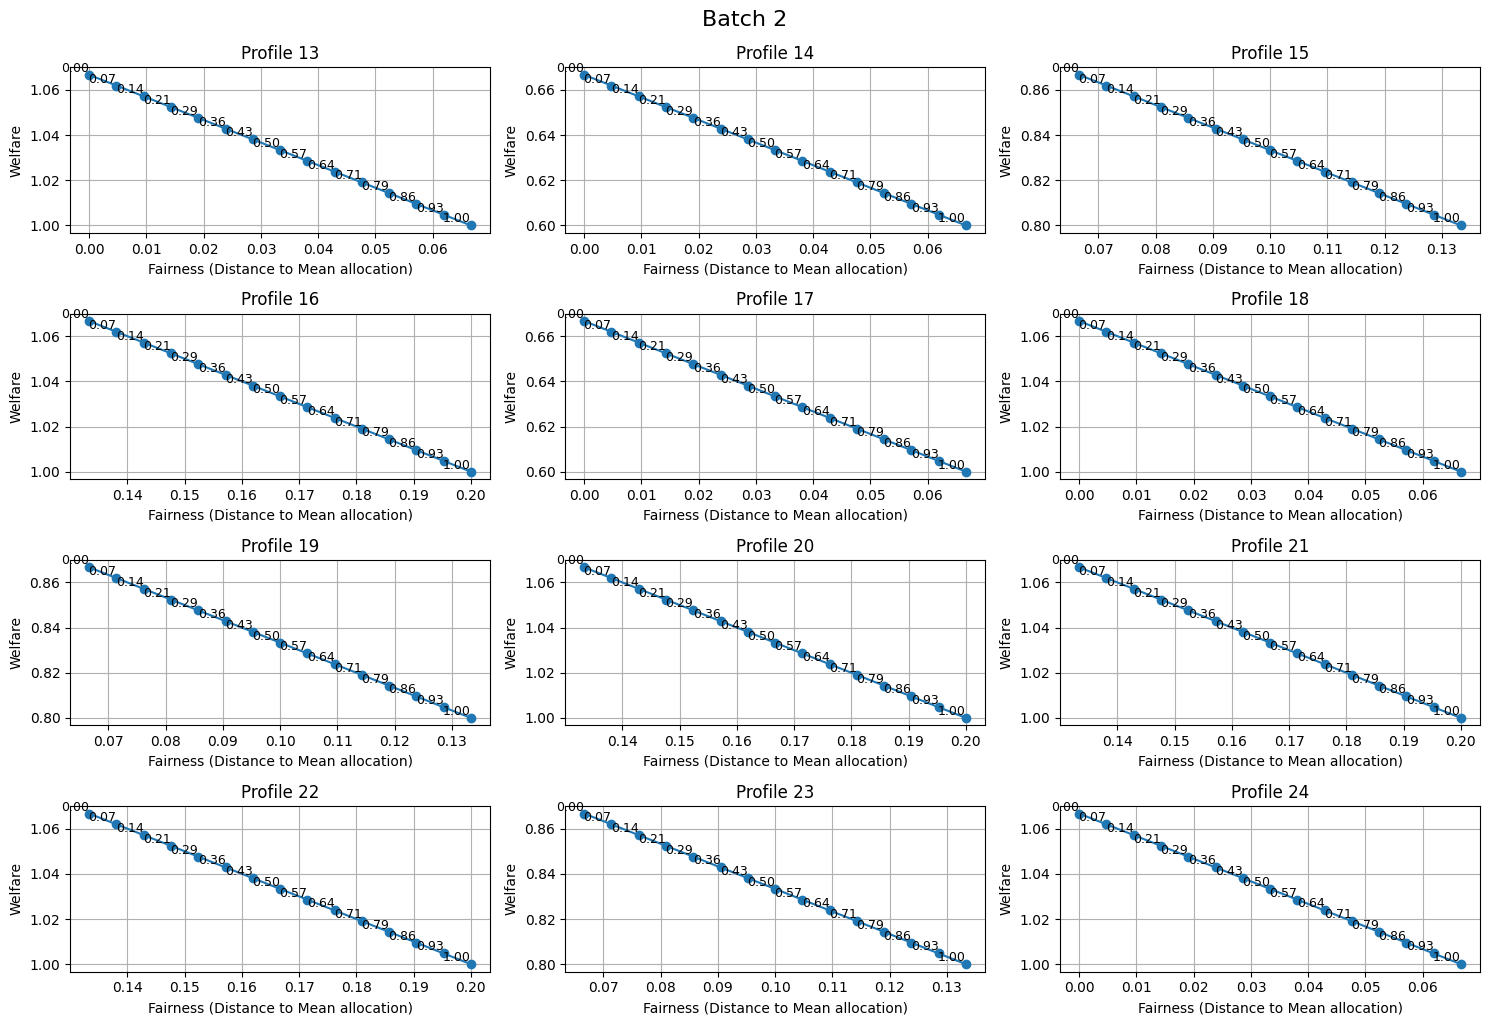

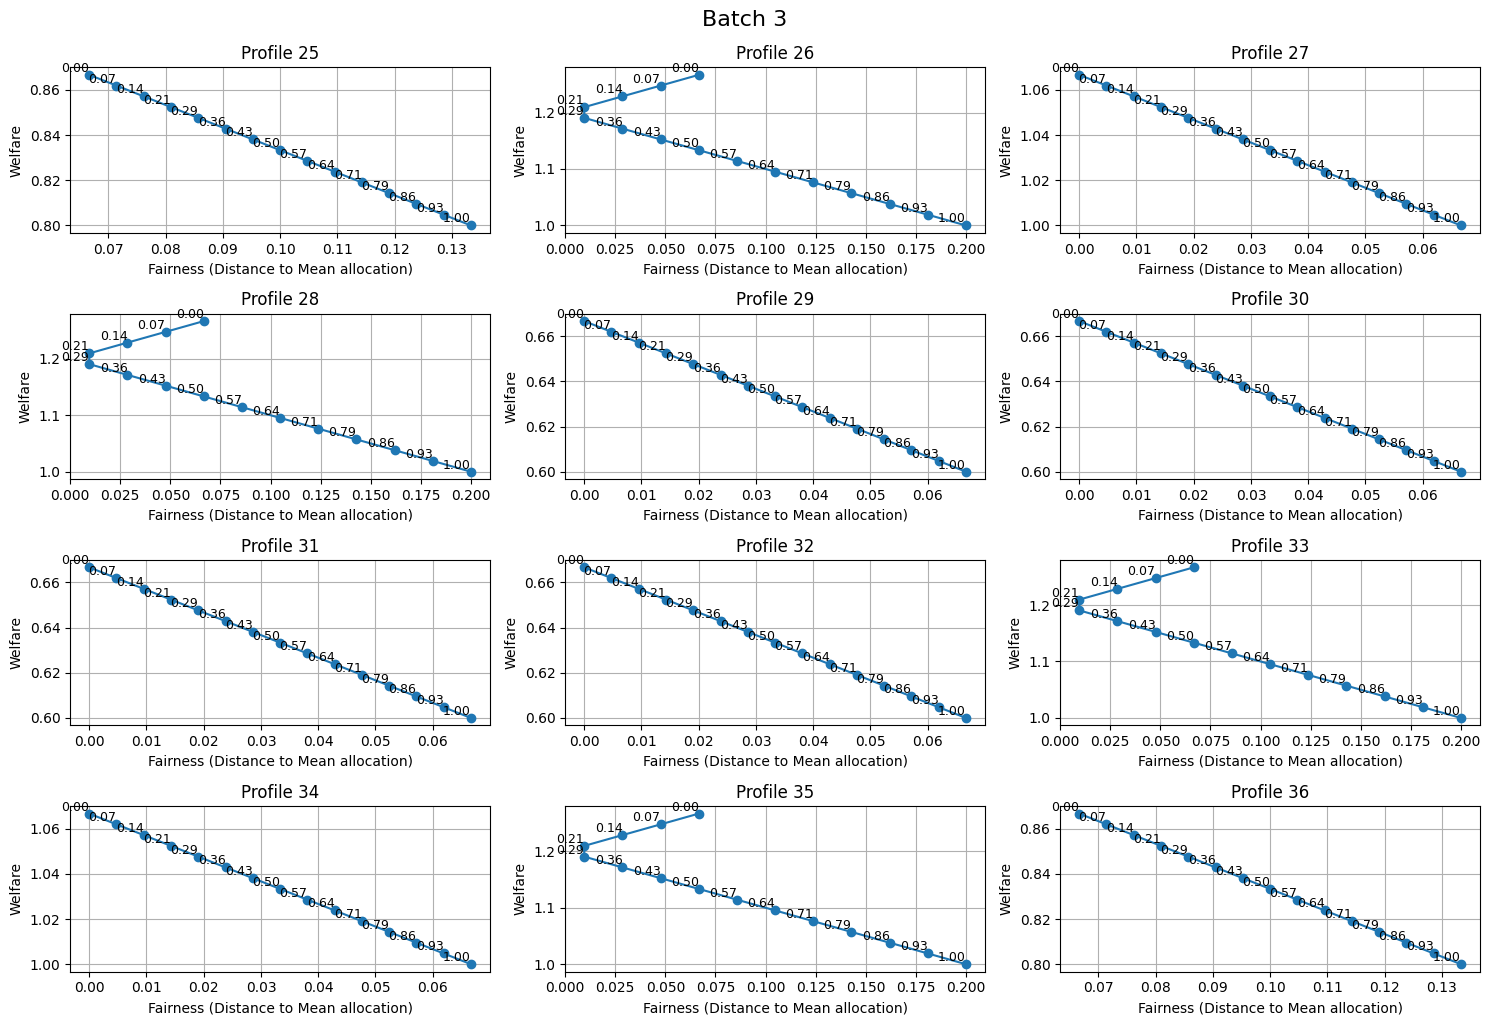

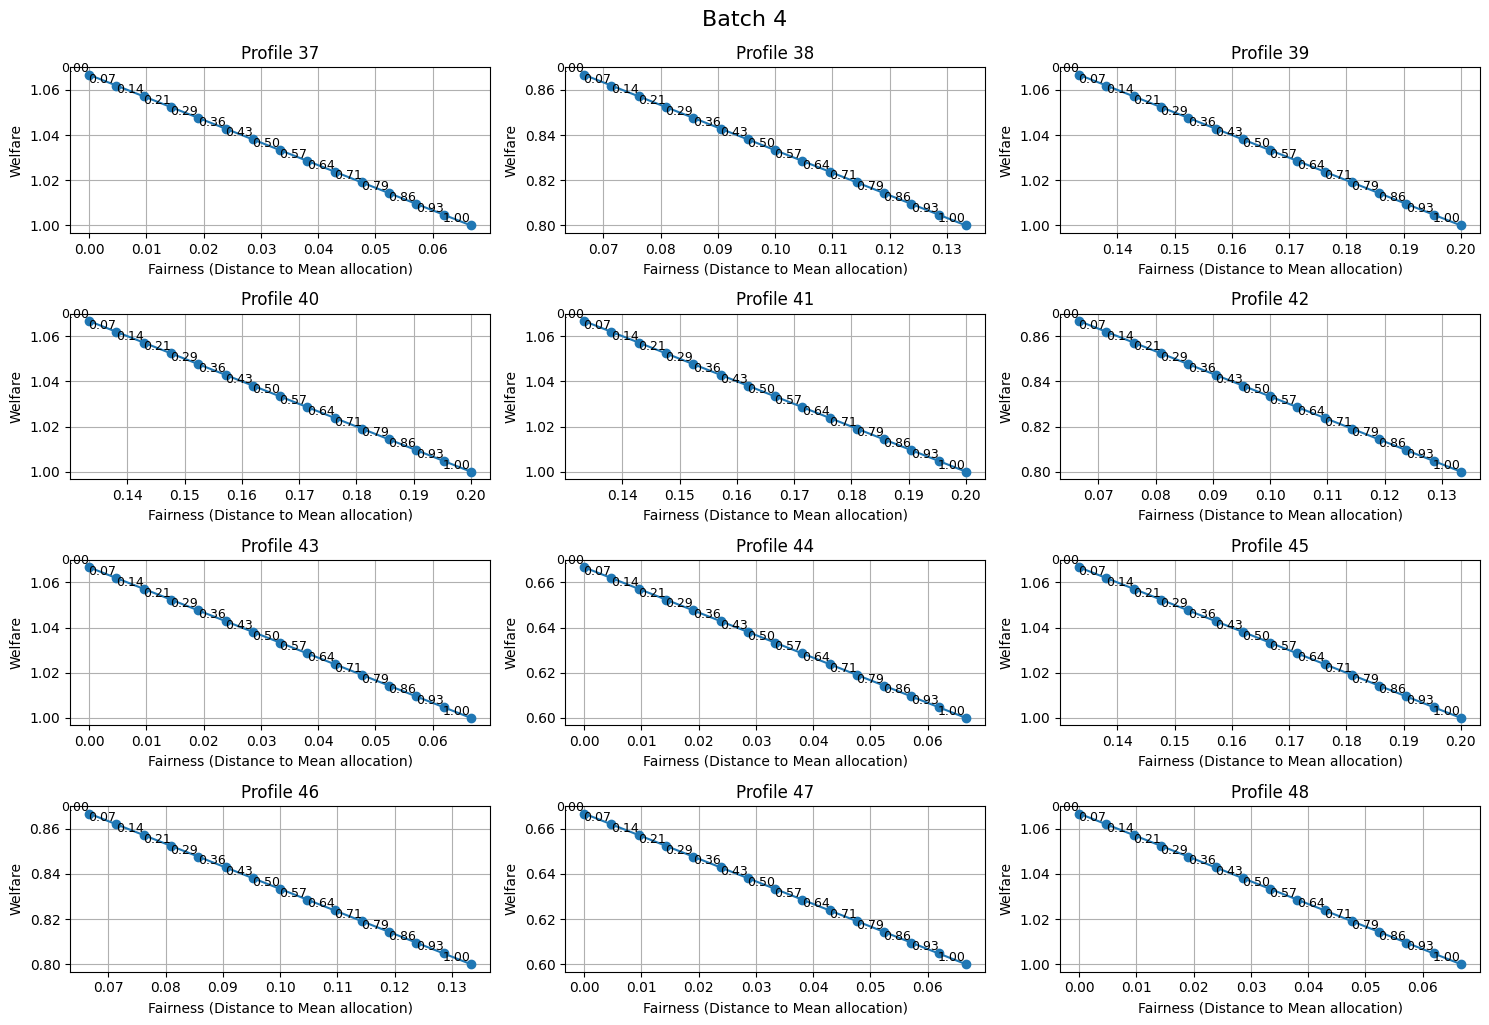

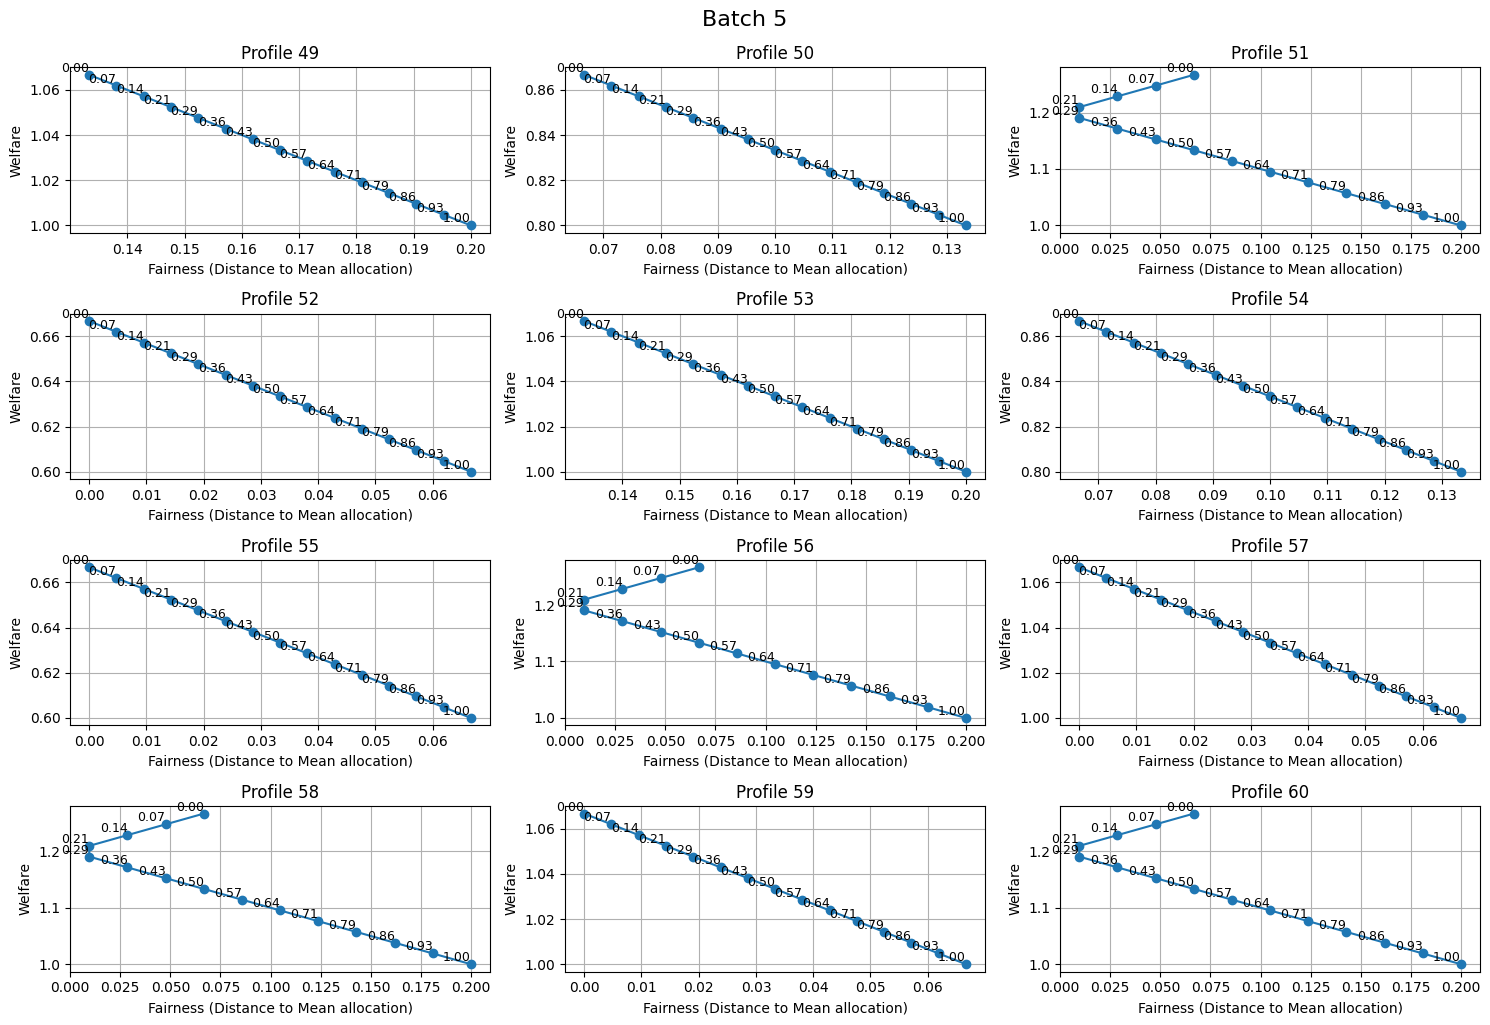

In [89]:
def plot2(P,alpha_count,fig,ax):

    n = P.shape[0]
    m = P.shape[1]
    alpha_values = np.linspace(0, 1, alpha_count)
    df1 = fyp.iterate_over_alphas(n, m, P, alpha_values, disutility_type='util')
    df2 = fyp.iterate_over_alphas(n, m, P, alpha_values, disutility_type='mean')

    both = pd.merge(df1,df2,on='alpha')
    both.rename(columns={'disutility_x':'Welfare','disutility_y':'Fairness'},inplace=True)
   

    ax.plot(both['Fairness'],both['Welfare'],marker ='o')

    for i, row in both.iterrows():
        label = f"{row['alpha']:.2f}"  # Format alpha to two decimal points
        ax.text(row['Fairness'],row['Welfare'],s = label, fontsize=9, ha='right', va='bottom')
        
    ax.set_title('Welfare & Fairness Tradeoff')
    ax.set_ylabel('Welfare')
    ax.set_xlabel('Fairness (Distance to Mean allocation)')
    ax.grid(True)
  

batch_size = 12  # Batch size
total_profiles = len(to_check2)  # Total number of profiles
num_batches = (total_profiles + batch_size - 1) // batch_size  # Number of batches

for batch_idx in range(num_batches):
    # Calculate the start and end index for the current batch
    start_idx = batch_idx * batch_size
    end_idx = min(start_idx + batch_size, total_profiles)

    # Get the current batch of profiles
    batch = to_check2[start_idx:end_idx]

    # Create a figure and a grid of subplots (4x3)
    fig, axes = plt.subplots(4, 3, figsize=(15, 10))  # Adjust figsize as needed
    axes = axes.flatten()  # Flatten the 4x3 grid into a 1D array of axes

    # Plot each profile in the batch
    for i, profile in enumerate(batch):
        ax = axes[i]
        plot2(profile, 15, fig, ax)  # Pass the axis to your plotting function
        ax.set_title(f"Profile {start_idx + i + 1}")  # Set a title for each subplot

    # Turn off unused subplots
    for j in range(len(batch), len(axes)):
        axes[j].axis('off')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle(f"Batch {batch_idx + 1}", fontsize=16, y=1.02)  # Set a title for the batch
    plt.show()

   

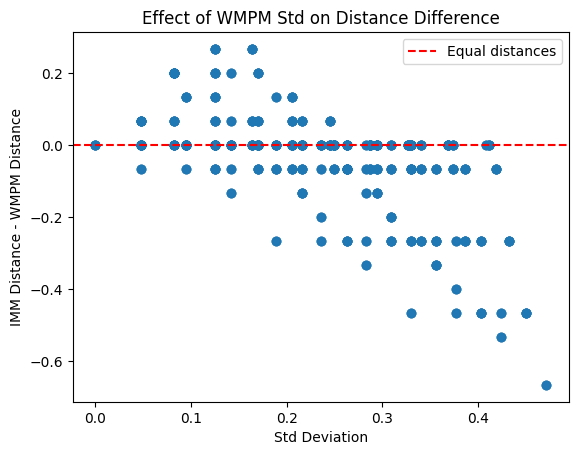

std
(0.0, 0.05]    0.012
(0.05, 0.1]    0.063
(0.1, 0.15]    0.053
(0.15, 0.2]    0.029
(0.2, 0.25]   -0.012
(0.25, 0.3]   -0.069
(0.3, 0.35]   -0.109
(0.35, 0.4]   -0.156
(0.4, 0.45]   -0.271
(0.45, 0.5]   -0.667
(0.5, 0.55]      NaN
(0.55, 0.6]      NaN
(0.6, 0.65]      NaN
(0.65, 0.7]      NaN
(0.7, 0.75]      NaN
(0.75, 0.8]      NaN
(0.8, 0.85]      NaN
(0.85, 0.9]      NaN
(0.9, 0.95]      NaN
Name: mean_diff, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22640\1568822551.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df3.groupby(pd.cut(df3['std'], bins=np.arange(0, 1, 0.05)))['mean_diff'].mean()


In [95]:
import matplotlib.pyplot as plt

df3['mean_diff'] = df3['dist_mean_IMM'] - df3['dist_mean_WMPM']

plt.scatter(df3['std'], df3['mean_diff'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--', label='Equal distances')
plt.xlabel('Std Deviation')
plt.ylabel('IMM Distance - WMPM Distance')
plt.title('Effect of WMPM Std on Distance Difference')
plt.legend()
plt.show()

# Summarize cases where WMPM outperforms IMM
summary = df3.groupby(pd.cut(df3['std'], bins=np.arange(0, 1, 0.05)))['mean_diff'].mean()
print(summary)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22640\1225919661.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


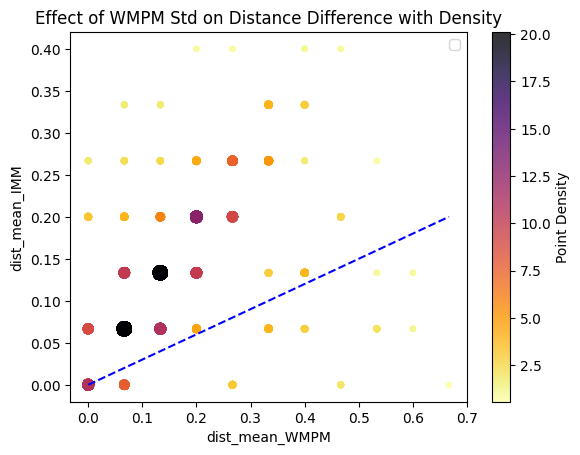

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calculate the point density using Gaussian KDE
x = df3['dist_mean_WMPM']
y = df3['dist_mean_IMM']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Normalize density values for better scaling of marker sizes
z_scaled = (z - z.min()) / (z.max() - z.min())  # Normalize to range [0, 1]
marker_sizes = 10 + z_scaled * 90  # Scale marker sizes (min size = 10, max = 100)

# Sort the points by density for proper rendering
idx = z.argsort()[::-1]  # Sort descending so higher density appears on top
x, y, z, marker_sizes = x[idx], y[idx], z[idx], marker_sizes[idx]

# Create the scatter plot
plt.scatter(x, y, c=z, cmap='inferno_r', s=marker_sizes, alpha=0.8)  # `inferno_r` for darker = higher density
# plt.axhline(0, color='red', linestyle='--', label='Equal distances')
# plt.axvline(0.25, color='green', linestyle='--', label='Threshold')
plt.colorbar(label='Point Density')
plt.xlabel('dist_mean_WMPM')
plt.ylabel('dist_mean_IMM')
plt.title('Effect of WMPM Std on Distance Difference with Density')
plt.legend()

plt.plot(np.linspace(0,max(df3['dist_mean_WMPM']), 100), 
         0.5 * np.linspace(0,max(df3['dist_mean_IMM']), 100), 
         color='blue', linestyle='--', label='y = 0.5x')

plt.show()

In [96]:
from sklearn.tree import DecisionTreeClassifier

# Create a binary target: 1 if dist_mean_WMPM < dist_mean_IMM, else 0

# Select features for analysis
X = df3[['std', 'skew','range']]
y = df3['is_WMPM_fairer']

# Train a decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

# Visualize feature importance
importances = tree.feature_importances_
print("Feature Importances:", dict(zip(X.columns, importances)))

Feature Importances: {'std': np.float64(0.7642553587281903), 'skew': np.float64(0.18487770029338169), 'range': np.float64(0.050866940978427956)}
